# Importing Libraries:-


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Loading Dataset:-

In [1]:
import pandas as pd

file_path = 'styles.csv'

try:
    df = pd.read_csv(file_path, engine='python', sep=',', error_bad_lines=False, warn_bad_lines=True)
    print("File opened successfully with python engine, skipping bad lines.")
except pd.errors.ParserError as e:
    print("ParserError:", e)
except Exception as e:
    print("An error occurred:", e)

C:\Users\hp\AppData\Local\Temp\ipykernel_7336\2431242789.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, engine='python', sep=',', error_bad_lines=False, warn_bad_lines=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_7336\2431242789.py:6: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(file_path, engine='python', sep=',', error_bad_lines=False, warn_bad_lines=True)
Skipping line 6044: Expected 10 fields in line 6044, saw 11
Skipping line 6569: Expected 10 fields in line 6569, saw 11
Skipping line 7399: Expected 10 fields in line 7399, saw 11
Skipping line 7939: Expected 10 fields in line 7939, saw 11
Skipping line 9026: Expected 10 fields in line 9026, saw 11
Skipping line 10264: Expected 10 fields in line 10264, saw 11
Skipping line 10427: Expected 10 fi

File opened successfully with python engine, skipping bad lines.


# Sanity Check

In [3]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
df.shape

(44424, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [11]:
df.describe()

,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [7]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [9]:
 df.isnull().sum()/df.shape[0]*100

id                    0.000000
gender                0.000000
masterCategory        0.000000
subCategory           0.000000
articleType           0.000000
baseColour            0.033766
season                0.047272
year                  0.002251
usage                 0.713578
productDisplayName    0.015757
dtype: float64

In [12]:
df.duplicated().sum()

0

#  Data Cleaning


In [2]:
styles_df =df.dropna().copy()

In [33]:
styles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44077 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44077 non-null  int64  
 1   gender              44077 non-null  object 
 2   masterCategory      44077 non-null  object 
 3   subCategory         44077 non-null  object 
 4   articleType         44077 non-null  object 
 5   baseColour          44077 non-null  object 
 6   season              44077 non-null  object 
 7   year                44077 non-null  float64
 8   usage               44077 non-null  object 
 9   productDisplayName  44077 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


In [34]:
styles_df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [35]:
#This will describe each column

for i in styles_df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("*****"*10)

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64
**************************************************
Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64
**************************************************
Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree     

# Univariant Analysis

In [36]:
#Basic statics for numerical columns-
print("\nBasic Statistics for Numerical Columns:")
print(styles_df.describe())



Basic Statistics for Numerical Columns:
                 id          year
count  44077.000000  44077.000000
mean   29550.577444   2012.782041
std    16974.233378      2.108119
min     1163.000000   2007.000000
25%    14722.000000   2011.000000
50%    28491.000000   2012.000000
75%    44407.000000   2015.000000
max    60000.000000   2019.000000



Gender Distribution:
Men       22109
Women     18357
Unisex     2126
Boys        830
Girls       655
Name: gender, dtype: int64


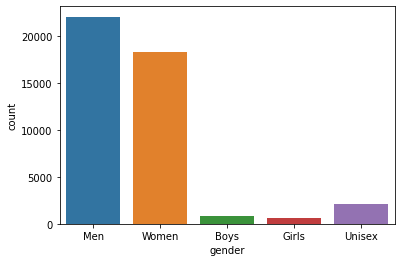

In [37]:
#Gender Distribution

print("\nGender Distribution:")
print(styles_df['gender'].value_counts())
sns.countplot(data=styles_df, x='gender')
plt.show()



Master Category Distribution:
Apparel           21366
Accessories       11244
Footwear           9197
Personal Care      2139
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64


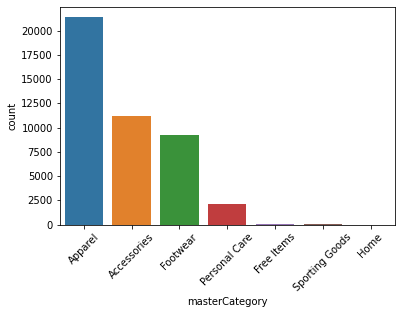

In [38]:
#MasterCategory Distribution

print("\nMaster Category Distribution:")
print(styles_df['masterCategory'].value_counts())
sns.countplot(data=styles_df, x='masterCategory')
plt.xticks(rotation=45)
plt.show()



Sub Category Distribution:
Topwear                     15387
Shoes                        7323
Bags                         3053
Bottomwear                   2686
Watches                      2542
Innerwear                    1806
Jewellery                    1079
Eyewear                      1073
Fragrance                    1001
Sandal                        961
Wallets                       925
Flip Flops                    913
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Lips                          425
Headwear                      293
Nails                         278
Makeup                        263
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin                

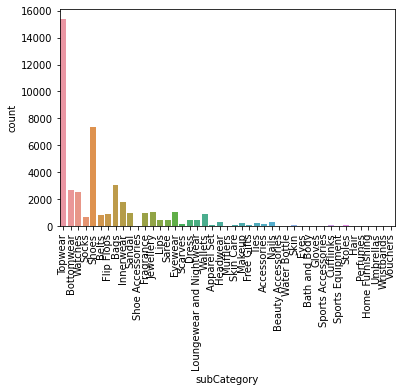

In [41]:
#Subcategory Distribution:

print("\nSub Category Distribution:")
print(styles_df['subCategory'].value_counts())
sns.countplot(data=styles_df, x='subCategory')
plt.xticks(rotation=90)
plt.show()



Article Type Distribution:
Tshirts              7066
Shirts               3214
Casual Shoes         2845
Watches              2542
Sports Shoes         2016
                     ... 
Ipad                    1
Suits                   1
Shoe Laces              1
Hair Accessory          1
Mens Grooming Kit       1
Name: articleType, Length: 142, dtype: int64


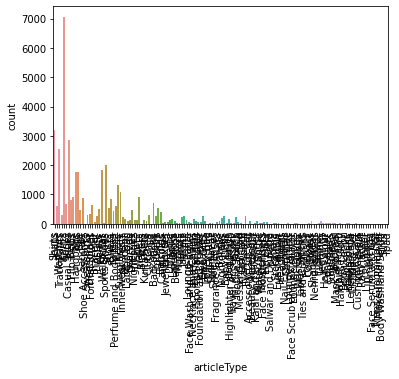

In [42]:
#Article Type Distribution

print("\nArticle Type Distribution:")
print(styles_df['articleType'].value_counts())
sns.countplot(data=styles_df, x='articleType')
plt.xticks(rotation=90)
plt.show()



Base Colour Distribution:
Black                9700
White                5497
Blue                 4907
Brown                3440
Grey                 2735
Red                  2434
Green                2103
Pink                 1824
Navy Blue            1784
Purple               1612
Silver               1089
Yellow                776
Beige                 745
Gold                  621
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 185
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic               41
Coffee Brow

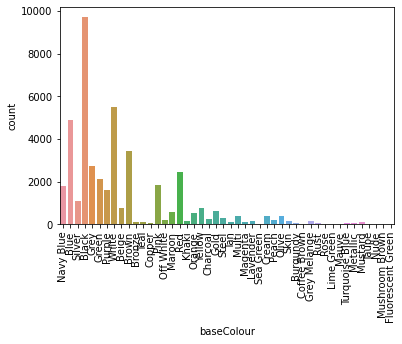

In [43]:
#Base Color Distribution

print("\nBase Colour Distribution:")
print(styles_df['baseColour'].value_counts())
sns.countplot(data=styles_df, x='baseColour')
plt.xticks(rotation=90)
plt.show()



Season Distribution:
Summer    21440
Fall      11414
Winter     8511
Spring     2712
Name: season, dtype: int64


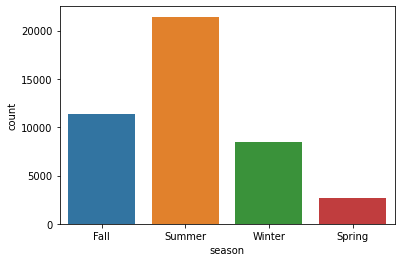

In [44]:
#Season Distribution

print("\nSeason Distribution:")
print(styles_df['season'].value_counts())
sns.countplot(data=styles_df, x='season')
plt.show()



Year Distribution:
2012.0    16268
2011.0    13634
2016.0     5998
2015.0     2775
2017.0     2649
2013.0     1205
2010.0      846
2018.0      404
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64


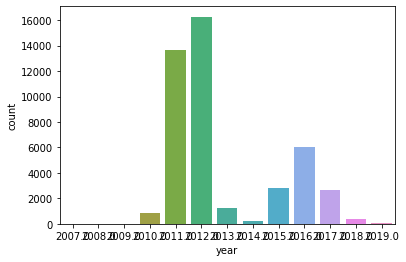

In [45]:
#Year Distribution:

print("\nYear Distribution:")
print(styles_df['year'].value_counts())
sns.countplot(data=styles_df, x='year')
plt.show()



Usage Distribution:
Casual          34397
Sports           4004
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64


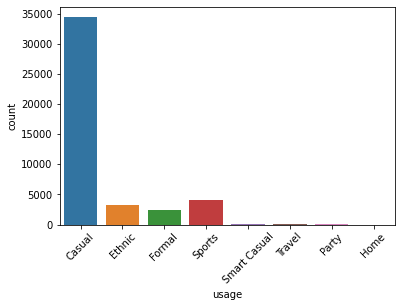

In [46]:
#Usage Distribution:

print("\nUsage Distribution:")
print(styles_df['usage'].value_counts())
sns.countplot(data=styles_df, x='usage')
plt.xticks(rotation=45)
plt.show()



Product Display Name Distribution (first 20 unique names):
Lucera Women Silver Earrings              82
Lucera Women Silver Pendant               56
Lucera Women Silver Ring                  50
Catwalk Women Black Heels                 48
Q&Q Men Black Dial Watch                  42
Fastrack Men Black Dial Watch             41
Maxima Men White Dial Watch               38
Fabindia Women Anusuya Silver Earrings    37
FNF Multi Coloured Printed Sari           32
Coolers Men Black Sandals                 31
Miami Blues Women Sunglasses              31
Murcia Women Brown Handbag                28
Lucera Women Silver Pendant with Chain    28
Murcia Women Black Handbag                28
Locomotive Men Washed Blue Jeans          27
Idee Men Black Sunglasses                 26
Red Tape Men Brown Shoes                  26
Titan Men White Dial Watch                26
Revv Men Steel Ring                       26
Mark Taylor Men Blue Striped Shirt        26
Name: productDisplayName, dtype: int64


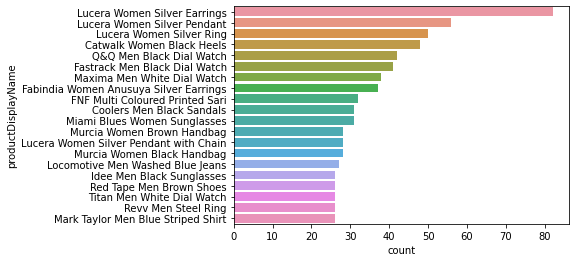

In [47]:
#Product Name:
print("\nProduct Display Name Distribution (first 20 unique names):")
print(styles_df['productDisplayName'].value_counts().head(20))
sns.countplot(data=styles_df, y='productDisplayName', order=styles_df['productDisplayName'].value_counts().iloc[:20].index)
plt.show()


In [67]:

styles_df.select_dtypes(include="object").columns

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName'],
      dtype='object')

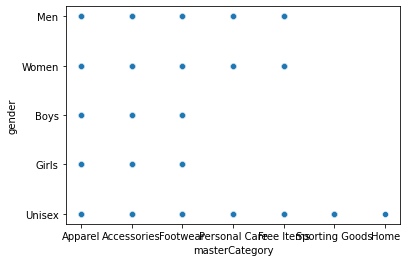

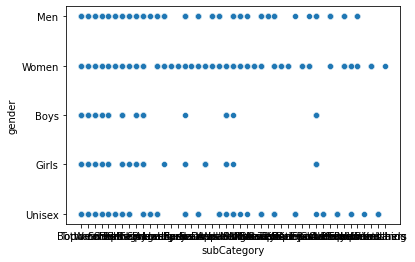

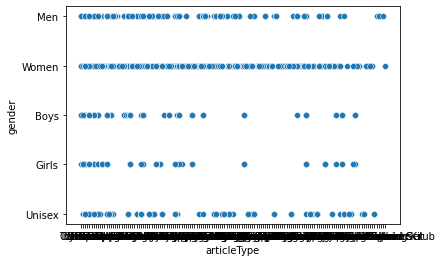

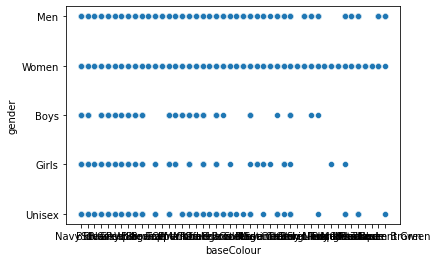

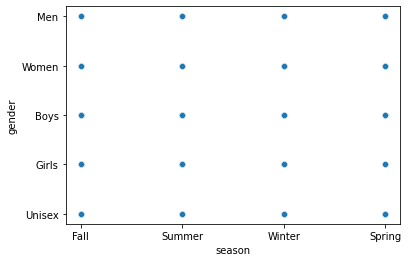

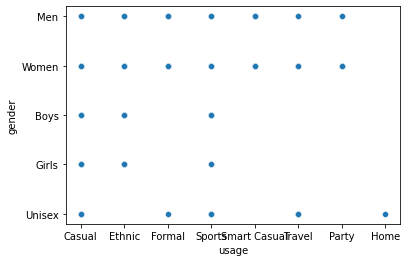

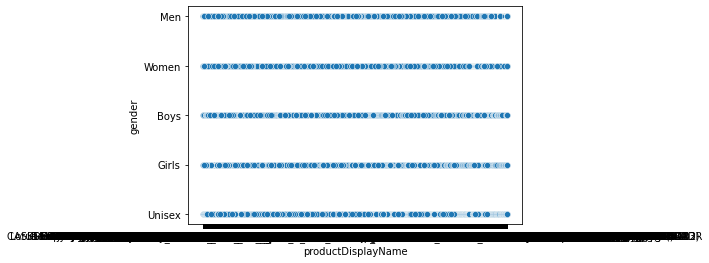

In [3]:
for i in [ 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName']:
    sns.scatterplot(data=df,x=i,y='gender')
    plt.show()

In [74]:
 
#correlation between data

df.select_dtypes(include="object").corr()

""


In [49]:
#Grouping by gender :
styles_df.groupby(['gender']).count()

,id,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
gender,,,,,,,,,
Boys,830,830,830,830,830,830,830,830,830
Girls,655,655,655,655,655,655,655,655,655
Men,22109,22109,22109,22109,22109,22109,22109,22109,22109
Unisex,2126,2126,2126,2126,2126,2126,2126,2126,2126
Women,18357,18357,18357,18357,18357,18357,18357,18357,18357


In [51]:
#Grouping by subcategory
styles_df.groupby(['subCategory']).count()

,id,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName
subCategory,,,,,,,,,
Accessories,129,129,129,129,129,129,129,129,129
Apparel Set,106,106,106,106,106,106,106,106,106
Bags,3053,3053,3053,3053,3053,3053,3053,3053,3053
Bath and Body,9,9,9,9,9,9,9,9,9
Beauty Accessories,3,3,3,3,3,3,3,3,3
Belts,811,811,811,811,811,811,811,811,811
Bottomwear,2686,2686,2686,2686,2686,2686,2686,2686,2686
Cufflinks,108,108,108,108,108,108,108,108,108
Dress,478,478,478,478,478,478,478,478,478


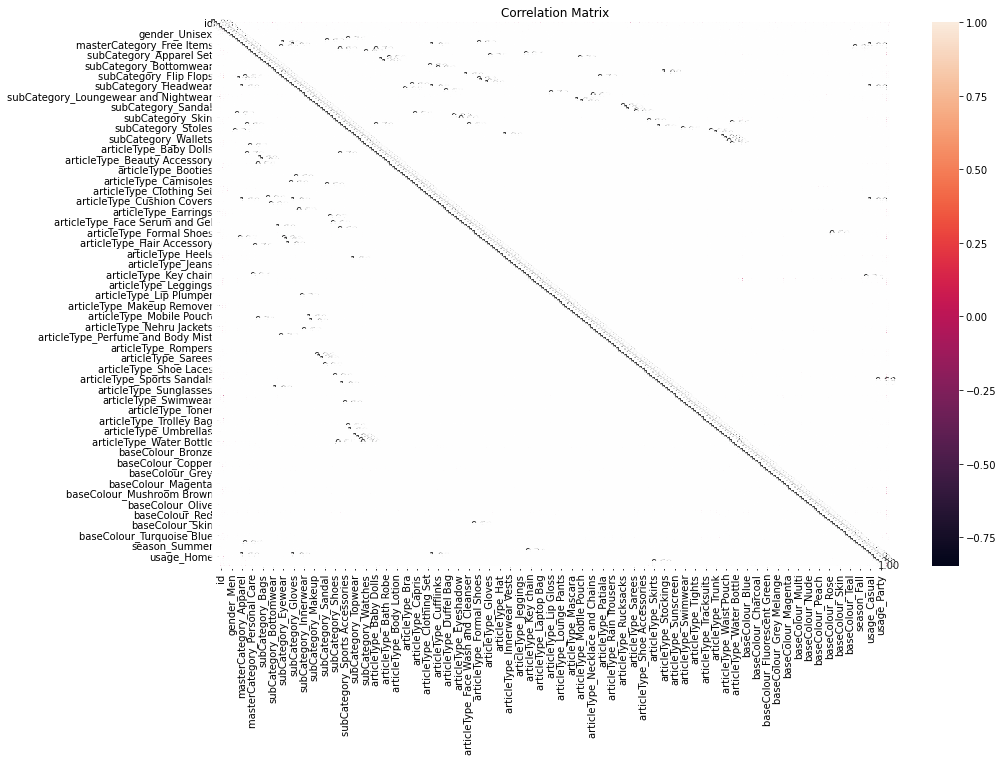

In [52]:
# Encode categorical features if necessary
encoded_df = pd.get_dummies( df, columns=['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage'])

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Multivariante Analysis:

In [54]:
#Get count of different features
pd.crosstab(styles_df["masterCategory"],styles_df["productDisplayName"])

productDisplayName,109F Blue A-Line Dress,109F Red & White A-Line Dress,109F Women Beige Embroidered Top,109F Women Black & Cream Dress,109F Women Black & Cream-Coloured Colourblocked Printed Tunic,109F Women Black & White Top,109F Women Black Embellished Tunic,109F Women Black Printed Kaftan Tunic,109F Women Black Printed Tunic,109F Women Blue & Green Polka Dot Print Tunic,...,s.Oliver Women's Department Refined Red T-shirt,s.Oliver Women's Green Blouse Shirt,s.Oliver Women's Printed Top Blue T-shirt,s.Oliver Women's Purple Blouse Top,s.Oliver Women's Sky Blue Top,s.Oliver Women's Striped Light Blue Top,s.Oliver Women's Tank Brown Top,s.Oliver Women's White Blouse Top,test dispName,united Colors Of Benetton Women Grey Tight
masterCategory,,,,,,,,,,,,,,,,,,,,,
Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Apparel,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
Footwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Free Items,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Home,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Personal Care,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sporting Goods,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#Get the count of different features
pd.crosstab(styles_df["subCategory"],styles_df["productDisplayName"])

productDisplayName,109F Blue A-Line Dress,109F Red & White A-Line Dress,109F Women Beige Embroidered Top,109F Women Black & Cream Dress,109F Women Black & Cream-Coloured Colourblocked Printed Tunic,109F Women Black & White Top,109F Women Black Embellished Tunic,109F Women Black Printed Kaftan Tunic,109F Women Black Printed Tunic,109F Women Blue & Green Polka Dot Print Tunic,...,s.Oliver Women's Department Refined Red T-shirt,s.Oliver Women's Green Blouse Shirt,s.Oliver Women's Printed Top Blue T-shirt,s.Oliver Women's Purple Blouse Top,s.Oliver Women's Sky Blue Top,s.Oliver Women's Striped Light Blue Top,s.Oliver Women's Tank Brown Top,s.Oliver Women's White Blouse Top,test dispName,united Colors Of Benetton Women Grey Tight
subCategory,,,,,,,,,,,,,,,,,,,,,
Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Apparel Set,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Bath and Body,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Beauty Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bottomwear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Cufflinks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dress,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Engineering

In [57]:
#  creating new features based on existing data

styles_df['is_recent'] = styles_df['year'] >= 2018  # Feature to identify recent items

In [58]:
styles_df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,is_recent
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,False
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,False
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,False
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,False
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,False
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,False
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,False
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,False
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,False


In [60]:
styles_df['is_recent']

0        False
1        False
2        False
3        False
4        False
         ...  
44419    False
44420    False
44421    False
44422    False
44423    False
Name: is_recent, Length: 44077, dtype: bool

In [64]:
# Check the distribution of base colors
base_color_distribution =  styles_df['baseColour'].value_counts()
print("\nBase color distribution in the dataset:")
print(base_color_distribution)


Base color distribution in the dataset:
Black                9700
White                5497
Blue                 4907
Brown                3440
Grey                 2735
Red                  2434
Green                2103
Pink                 1824
Navy Blue            1784
Purple               1612
Silver               1089
Yellow                776
Beige                 745
Gold                  621
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 185
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic               

In [63]:
# Grouping items by their base color

color_groups =df.groupby('baseColour')

# Function to get color-coordinated recommendations
def get_color_coordinated_recommendations(product_id, num_recommendations=10):
    base_color =  styles_df.loc[styles_df['id'] == product_id, 'baseColour'].values[0]
    color_group =  styles_df[ styles_df['baseColour'] == base_color]
    recommendations = color_group.sample(n=num_recommendations, random_state=42)
    return recommendations[['productDisplayName', 'baseColour', 'season', 'articleType', 'usage']]

#  usage
example_product_id = df['id'].iloc[0]
recommendations_df = get_color_coordinated_recommendations(example_product_id)

# Print the recommendations in table format
print("\nColor coordinated recommendations for the product in table format:")
print(recommendations_df.to_string(index=False))
 


Color coordinated recommendations for the product in table format:
                              productDisplayName baseColour  season   articleType   usage
       Mark Taylor Men Navy Blue Printed T-shirt  Navy Blue    Fall       Tshirts  Casual
 United Colors of Benetton Women Navy Blue Dress  Navy Blue    Fall       Dresses  Casual
                   Indigo Nation Navy Blue Shirt  Navy Blue  Summer        Shirts  Casual
               Reid & Taylor Men Navy Blue Socks  Navy Blue  Summer         Socks  Casual
                 Park Avenue Men Navy Blue Brief  Navy Blue  Summer        Briefs  Casual
    ADIDAS Unisex Power Dark Navy White Backpack  Navy Blue  Summer     Backpacks  Sports
     ADIDAS Originals Men  Polo Navy Blue Tshirt  Navy Blue    Fall       Tshirts  Casual
                        Vans Men Navy Blue Shoes  Navy Blue  Summer  Casual Shoes  Casual
               Puma Men Graphic Navy Blue TShirt  Navy Blue    Fall       Tshirts  Casual
        ADIDAS Men Ess F Logo Na

In [65]:
 
# Determine the current season based on the current month
current_month = pd.to_datetime('today').month
if current_month in [12, 1, 2]:
    current_season = 'Winter'
elif current_month in [3, 4, 5]:
    current_season = 'Spring'
elif current_month in [6, 7, 8]:
    current_season = 'Summer'
else:
    current_season = 'Fall'

# Function to get seasonal recommendations
def get_seasonal_recommendations(num_recommendations=10):
    seasonal_items =  styles_df[ styles_df['season'] == current_season]
    
    # If there are not enough items in the season, adjust the number of recommendations
    if len(seasonal_items) < num_recommendations:
        num_recommendations = len(seasonal_items)
    
    recommendations = seasonal_items.sample(n=num_recommendations, random_state=42)
    return recommendations[['productDisplayName', 'baseColour', 'season', 'articleType', 'usage']]

# Example usage
recommendations_df = get_seasonal_recommendations()

# Print the recommendations in table format
print("\nSeasonal recommendations for the current season in table format:")
print(recommendations_df.to_string(index=False))





Seasonal recommendations for the current season in table format:
                                 productDisplayName baseColour  season   articleType   usage
 Nike Men Air Courtballistec 4.1 White Sports Shoes      White  Summer  Sports Shoes  Sports
                      Gini and Jony Girls Peach Top      Peach  Summer          Tops  Casual
                 Globalite Men Navy Blue Skid Shoes       Grey  Summer  Casual Shoes  Casual
                      Basics Men Pack of 3 T-shirts      White  Summer       Tshirts  Casual
                      Hidekraft Women Black Handbag      Black  Summer      Handbags  Casual
                      Lino Perros Women Purple Belt     Purple  Summer         Belts  Casual
                Gini and Jony Girls Blue Saloppette       Blue  Summer       Dresses  Casual
                    Diva Women Purple & White Kurta     Purple  Summer        Kurtas  Ethnic
                      Lee Women's Wild Grey T-shirt       Grey  Summer       Tshirts  Casual
    

In [66]:
 
# Determine the current season based on the current month
current_month = pd.to_datetime('today').month
if current_month in [12, 1, 2]:
    current_season = 'Winter'
elif current_month in [3, 4, 5]:
    current_season = 'Spring'
elif current_month in [6, 7, 8]:
    current_season = 'Summer'
else:
    current_season = 'Fall'

# Function to get combined recommendations
def combined_recommendations(product_id, num_recommendations=10):
    # Get base color and current season
    base_color =  styles_df.loc[ styles_df['id'] == product_id, 'baseColour'].values[0]
    seasonal_items =  styles_df[ styles_df['season'] == current_season]
    
    # Filter items by base color and season
    filtered_items = seasonal_items[seasonal_items['baseColour'] == base_color]
    
    # If there are not enough items, adjust the number of recommendations
    if len(filtered_items) < num_recommendations:
        num_recommendations = len(filtered_items)
    
    # Randomly sample the filtered items
    recommendations = filtered_items.sample(n=num_recommendations, random_state=42)
    return recommendations[['productDisplayName', 'baseColour', 'season', 'articleType', 'usage']]

#  usage
example_product_id =  styles_df['id'].iloc[0]
recommendations_df = combined_recommendations(example_product_id)

# Print the recommendations in table format
print("\nCombined recommendations for the product in table format:")
print(recommendations_df.to_string(index=False))



Combined recommendations for the product in table format:
                                     productDisplayName baseColour  season   articleType   usage
             Tantra Women Navy Blue Supermantra T-shirt  Navy Blue  Summer       Tshirts  Casual
                   Fila Men's Oxidised Navy Canvas Shoe  Navy Blue  Summer  Casual Shoes  Casual
           SDL by Sweet Dreams Men Navy Blue Pyjama Set  Navy Blue  Summer   Night suits  Casual
                           Myntra Men Navy Blue T-shirt  Navy Blue  Summer       Tshirts  Casual
         Jealous 21 Women Navy Top With Pink Flower Top  Navy Blue  Summer          Tops  Casual
                      Playboy Women Playmate Navy Socks  Navy Blue  Summer         Socks  Casual
 French Connection Navy Washed Skinny Stretchable Jeans  Navy Blue  Summer         Jeans  Casual
                     Puma Men Wind Navy Blue Track Pant  Navy Blue  Summer   Track Pants  Sports
            Lotto Men's Tennis Mule Navy Blue Flip Flop  Navy Blue  

                              productDisplayName  cluster
0               Turtle Check Men Navy Blue Shirt        3
1             Peter England Men Party Blue Jeans        0
2                       Titan Women Silver Watch        1
3  Manchester United Men Solid Black Track Pants        9
4                          Puma Men Grey T-shirt        7


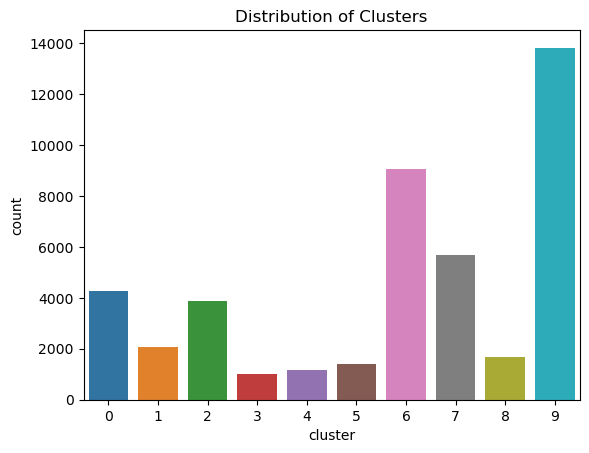

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
# Assuming styles_df is already loaded

# Fill missing values in productDisplayName
styles_df['productDisplayName'] = styles_df['productDisplayName'].fillna('')

# Extract features from productDisplayName using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(styles_df['productDisplayName'])

# Apply K-means clustering
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
styles_df['cluster'] = km.fit_predict(tfidf_matrix)

# Analyze clusters
print(styles_df[['productDisplayName', 'cluster']].head())

# Visualize clusters
sns.countplot(x='cluster', data=styles_df)
plt.title('Distribution of Clusters')
plt.show()


In [10]:
def get_cluster_recommendations(product_id, num_recommendations=5):
    cluster_label =  styles_df.loc[ styles_df['id'] == product_id, 'cluster'].values[0]
    cluster_products =  styles_df[ styles_df['cluster'] == cluster_label]
    recommendations = cluster_products.sample(n=num_recommendations, random_state=42)
    return recommendations[['productDisplayName', 'id']]

# Example usage
example_product_id =  styles_df['id'].iloc[0]
print("\nCluster-based recommendations for the product:")
print(get_cluster_recommendations(example_product_id))



Cluster-based recommendations for the product:
                              productDisplayName     id
18940  Scullers Men Scul Black White Check Shirt   7175
24096              Lee Men Henry Red Check Shirt  31781
16936               Myntra Men White Check Shirt  51414
5529     French Connection Men Brown Check Shirt  48372
18846            Arrow Sport Men Red Check Shirt  26515


In [13]:
styles_df.to_csv('preprocessed_dataset.csv', index=False)

In [15]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset.csv')

# Display the loaded DataFrame
print("Loaded Preprocessed DataFrame:")
print(df.info())
df.isnull().sum()

Loaded Preprocessed DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44077 entries, 0 to 44076
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44077 non-null  int64  
 1   gender              44077 non-null  object 
 2   masterCategory      44077 non-null  object 
 3   subCategory         44077 non-null  object 
 4   articleType         44077 non-null  object 
 5   baseColour          44077 non-null  object 
 6   season              44077 non-null  object 
 7   year                44077 non-null  float64
 8   usage               44077 non-null  object 
 9   productDisplayName  44077 non-null  object 
 10  cluster             44077 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 3.7+ MB
None


id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
cluster               0
dtype: int64

# Image Processing:

In [12]:
 


import pandas as pd
import os
from PIL import Image
import numpy as np

In [18]:
csv_file_path = 'preprocessed_dataset.csv'
df = pd.read_csv(csv_file_path)

In [29]:
images_folder_path = 'F:\fashion.csv\images'
processed_images_folder_path = 'F:\fashion.csv\processed_images'


In [31]:
import os
from PIL import Image
import numpy as np

# Define the function to preprocess an image
def preprocess_image(image_path, target_size=(224, 224)):
    # Open an image file
    with Image.open(image_path) as img:
        # Resize image
        img = img.resize(target_size)
        
        # Convert image to array
        img_array = np.array(img)
        
        # Normalize image
        img_array = img_array / 255.0
        
        return img_array

# Specify the folder containing images
images_folder_path = r'F:\fashion.csv\images'

# Example: Process a single image (ensure you have the correct file name)
example_image_filename = '1163.jpg'
image_path = os.path.join(images_folder_path, example_image_filename)

# Preprocess the image
try:
    preprocessed_image = preprocess_image(image_path)
    print(preprocessed_image.shape)
except FileNotFoundError:
    print(f"File not found: {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")

#Process multiple images ( have multiple images)
for filename in os.listdir(images_folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust based on your file types
        image_path = os.path.join(images_folder_path, filename)
        try:
            preprocessed_image = preprocess_image(image_path)
            print(f"Processed {filename}: {preprocessed_image.shape}")
        except FileNotFoundError:
            print(f"File not found: {image_path}")
        except Exception as e:
            print(f"An error occurred with {filename}: {e}")


(224, 224, 3)
Processed 10000.jpg: (224, 224, 3)
Processed 10001.jpg: (224, 224, 3)
Processed 10002.jpg: (224, 224, 3)
Processed 10003.jpg: (224, 224, 3)
Processed 10004.jpg: (224, 224, 3)
Processed 10005.jpg: (224, 224, 3)
Processed 10006.jpg: (224, 224, 3)
Processed 10007.jpg: (224, 224, 3)
Processed 10008.jpg: (224, 224, 3)
Processed 10009.jpg: (224, 224, 3)
Processed 10010.jpg: (224, 224, 3)
Processed 10011.jpg: (224, 224, 3)
Processed 10012.jpg: (224, 224, 3)
Processed 10013.jpg: (224, 224, 3)
Processed 10014.jpg: (224, 224, 3)
Processed 10015.jpg: (224, 224, 3)
Processed 10016.jpg: (224, 224, 3)
Processed 10017.jpg: (224, 224, 3)
Processed 10018.jpg: (224, 224, 3)
Processed 10019.jpg: (224, 224, 3)
Processed 10020.jpg: (224, 224, 3)
Processed 10021.jpg: (224, 224, 3)
Processed 10022.jpg: (224, 224, 3)
Processed 10023.jpg: (224, 224, 3)
Processed 10024.jpg: (224, 224, 3)
Processed 10025.jpg: (224, 224, 3)
Processed 10026.jpg: (224, 224, 3)
Processed 10027.jpg: (224, 224, 3)
Proces

KeyboardInterrupt: 

In [37]:
import pathlib
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt



import matplotlib.image as mpimg

import cv2


In [39]:
path = 'F:\\fashion.csv\\'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) #list content of dataset
dirs_names


['images', 'myntradataset', 'styles.csv']

In [40]:
df = pd.read_csv(path + "preprocessed_dataset.csv",on_bad_lines='skip')
df['image'] =  df.apply(lambda x: str(x['id']) + ".jpg", axis=1)
print( df.shape)
df.head()

(44077, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,cluster,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,3,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,0,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,1,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,9,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,7,53759.jpg


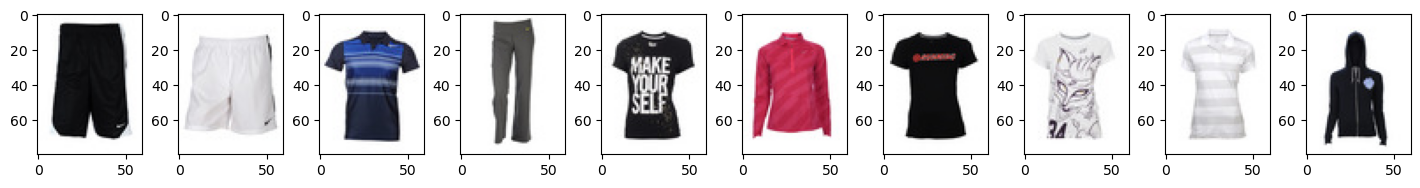

In [41]:
#plot sample
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img = mpimg.imread(path + 'images/100' + str(i) +'.jpg') #Assign image ids
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

# Features Extraction:


In [42]:
pip install pandas numpy tensorflow pillow


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 26.4/26.4 MB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 42.6/42.6 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)


102967424/102967424 [==============================] - 21s 0us/step


In [2]:
# Load the styles.csv file
styles_df = pd.read_csv('preprocessed_dataset.csv')


In [3]:
def extract_features(image_path):
    try:
        img = load_img(image_path, target_size=(224, 224))  # Load the image with target size
        img_array = img_to_array(img)  # Convert image to array
        img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit model input
        img_array = preprocess_input(img_array)  # Preprocess the image
        features = model.predict(img_array)  # Extract features
        return features.flatten()  # Flatten the features to 1D array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None


In [4]:
images_folder_path = 'F:\fashion.csv\images'
# Initialize a list to store image features
image_features_list = []

# Loop through the DataFrame and extract features for each image
for index, row in styles_df.iterrows():
    image_id = row['id']
    image_path = os.path.join(images_folder_path, f'{image_id}.jpg')
    
    # Check if image exists
    if os.path.exists(image_path):
        features = extract_features(image_path)
        if features is not None:
            image_features_list.append(features)
        else:
            image_features_list.append([None] * 2048)  # Assuming 2048 features from ResNet50
    else:
        print(f"Image {image_id}.jpg not found.")
        image_features_list.append([None] * 2048)  # Assuming 2048 features from ResNet50


Image 15970.jpg not found.
Image 39386.jpg not found.
Image 59263.jpg not found.
Image 21379.jpg not found.
Image 53759.jpg not found.
Image 1855.jpg not found.
Image 30805.jpg not found.
Image 26960.jpg not found.
Image 29114.jpg not found.
Image 30039.jpg not found.
Image 9204.jpg not found.
Image 48123.jpg not found.
Image 18653.jpg not found.
Image 47957.jpg not found.
Image 46885.jpg not found.
Image 12369.jpg not found.
Image 29928.jpg not found.
Image 42419.jpg not found.
Image 51832.jpg not found.
Image 47359.jpg not found.
Image 17429.jpg not found.
Image 12967.jpg not found.
Image 6842.jpg not found.
Image 13089.jpg not found.
Image 18461.jpg not found.
Image 9036.jpg not found.
Image 48311.jpg not found.
Image 7990.jpg not found.
Image 56019.jpg not found.
Image 21977.jpg not found.
Image 37812.jpg not found.
Image 4729.jpg not found.
Image 56825.jpg not found.
Image 39988.jpg not found.
Image 59051.jpg not found.
Image 20099.jpg not found.
Image 58183.jpg not found.
Image 2

In [5]:
import os

images_folder_path = 'F:\\fashion.csv\\images'  # Make sure the backslashes are escaped or use raw string
styles_df = pd.read_csv('F:\\fashion.csv\\preprocessed_dataset.csv')

# Print the first few paths to check
for index, row in styles_df.iterrows():
    image_id = row['id']
    image_path = os.path.join(images_folder_path, f'{image_id}.jpg')
    print(image_path)
    if index == 10:  # Print only first 10 paths
        break


F:\fashion.csv\images\15970.jpg
F:\fashion.csv\images\39386.jpg
F:\fashion.csv\images\59263.jpg
F:\fashion.csv\images\21379.jpg
F:\fashion.csv\images\53759.jpg
F:\fashion.csv\images\1855.jpg
F:\fashion.csv\images\30805.jpg
F:\fashion.csv\images\26960.jpg
F:\fashion.csv\images\29114.jpg
F:\fashion.csv\images\30039.jpg
F:\fashion.csv\images\9204.jpg


In [8]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

def extract_features(img_path):
    try:
        img = image.load_img(img_path, target_size=(224, 224))
        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data)
        
        resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
        features = resnet_model.predict(img_data)
        return features.flatten()
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return None

images_folder_path = 'F:\\fashion.csv\\images'
styles_df = pd.read_csv('F:\\fashion.csv\\preprocessed_dataset.csv')

# Initialize a list to store image features
image_features_list = []

# Loop through the DataFrame and extract features for each image
for index, row in styles_df.iterrows():
    image_id = row['id']
    image_path = os.path.join(images_folder_path, f'{image_id}.jpg')
    
    # Check if image exists
    if os.path.exists(image_path):
        features = extract_features(image_path)
        if features is not None:
            image_features_list.append(features)
        else:
            image_features_list.append([None] * 2048)  # Assuming 2048 features from ResNet50
    else:
        print(f"Image {image_id}.jpg not found.")
        image_features_list.append([None] * 2048)  # Assuming 2048 features from ResNet50

# Convert the list of features to a DataFrame
features_df = pd.DataFrame(image_features_list)
features_df.columns = [f'feature_{i}' for i in range(2048)]

# Save the features to a CSV file
features_df.to_csv('image_features.csv', index=False)


1/1 [==============================] - 2s 2s/step
